# Support Vector Machines (SVM)

Two types
* Hard margin svm
* soft margin svm

In [56]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [24]:
X, y = make_classification(
    n_samples=150,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

In [25]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


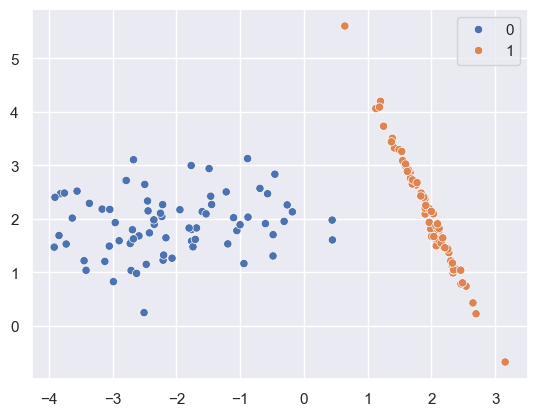

In [26]:
# visualizing the data

sns.set_theme(style='darkgrid')
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
clf = SVC(kernel='linear', C=1e6) # large C value makes hard margin svm
clf.fit(x_train, y_train)

SVC(C=1000000.0, kernel='linear')

In [43]:
# weights

w = clf.coef_[0]
b = clf.intercept_[0]

print(f"weights: {w}")
print(f"intercept: {b}")

weights: [1.37474889 0.50821396]
intercept: -2.6140811095538634


In [51]:
# test data

y_pred = clf.predict(x_test)

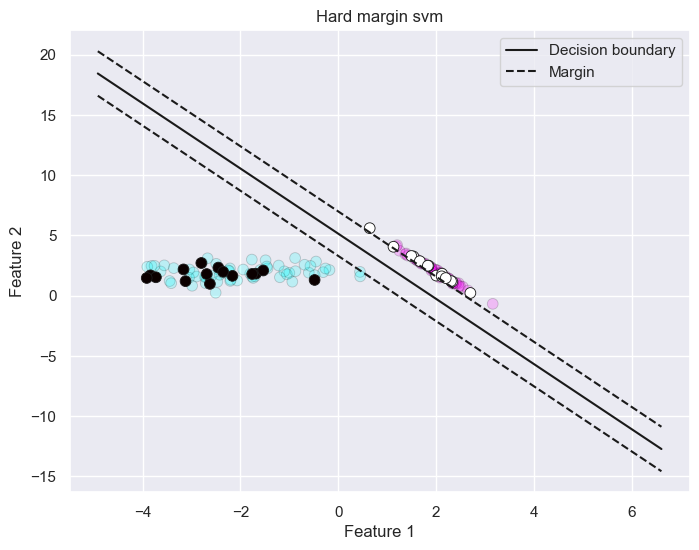

In [54]:
x_min, x_max = X[:, 0].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0]/w[1])*xx - b/w[1]

margin = 1/np.linalg.norm(w)
yy_down = yy - (w[0]/w[1])*margin
yy_up = yy + (w[0]/w[1])*margin

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], c=y_train, cmap = 'cool', s=60, edgecolors='k', alpha = 0.2)
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], c=y_pred, cmap = 'hot', s = 60, edgecolors = 'k')

plt.plot(xx, yy, "k-", label = "Decision boundary")
plt.plot(xx, yy_down, "k--", label = "Margin")
plt.plot(xx, yy_up, "k--")

plt.legend()
plt.title("Hard margin svm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [50]:
print("Number of support vecotors per class:", clf.n_support_)
print("\nSupport vecotors: \n", clf.support_vectors_)
print("\nIndices of support vectors:", clf.support_)

Number of support vecotors per class: [1 2]

Support vecotors: 
 [[0.44300959 1.97732208]
 [1.24939253 3.73135839]
 [2.07555154 1.4974439 ]]

Indices of support vectors: [ 14  98 107]


In [57]:
# hard margin svm doesn't allows misclassification

y_test_pred = clf.predict(x_test)


print(f"accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"precision_score: {precision_score(y_test, y_test_pred):.4f}")
print(f"recall_score: {recall_score(y_test_pred, y_test):.4f}")
print(f"f1 score: {f1_score(y_test, y_test_pred):.4f}")

accuracy_score: 1.0000
precision_score: 1.0000
recall_score: 1.0000
f1 score: 1.0000


## Soft Margin SVM

In [61]:
X, y = make_classification(
    n_samples=150,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=45
)

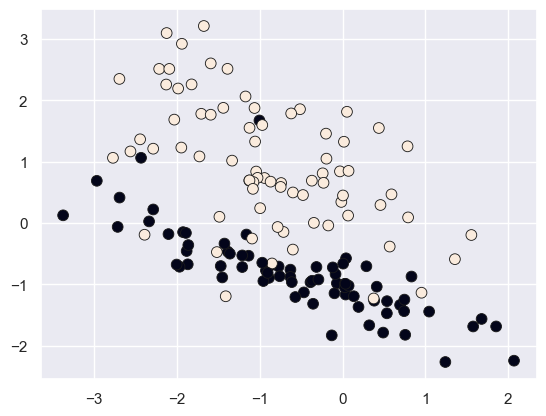

In [62]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], c=y, s = 60, edgecolor= 'k')
plt.show()

Here data is not linearly seperable
* so in these cases soft margin SVM is used, this allows misclassifications

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

In [65]:
clf_soft = SVC(kernel="linear", C=1.0)
clf_soft.fit(x_train, y_train)

SVC(kernel='linear')

In [67]:
# weights

w = clf_soft.coef_[0]
b = clf_soft.intercept_[0]

print(f"weights: {w}")
print(f"intercept: {b}")

weights: [0.75334414 1.85193866]
intercept: 0.723003929512287


In [68]:
y_pred = clf_soft.predict(x_test)

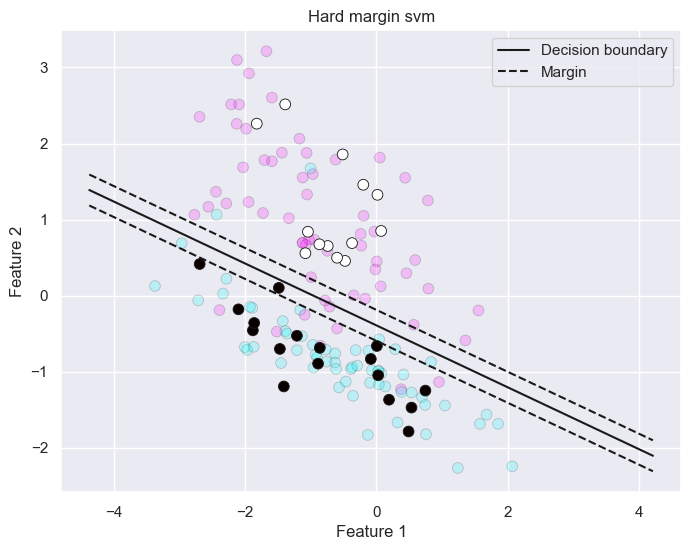

In [69]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0]/w[1])*xx - b/w[1]

margin = 1/np.linalg.norm(w)
yy_down = yy - (w[0]/w[1])*margin
yy_up = yy + (w[0]/w[1])*margin

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], c=y_train, cmap = 'cool', s=60, edgecolors='k', alpha = 0.2)
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], c=y_pred, cmap = 'hot', s = 60, edgecolors = 'k')

plt.plot(xx, yy, "k-", label = "Decision boundary")
plt.plot(xx, yy_down, "k--", label = "Margin")
plt.plot(xx, yy_up, "k--")

plt.legend()
plt.title("Hard margin svm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [70]:
# the number of support vecotors also increased (both margin vectors, and slack variable vectors also calculated)

print("Number of support vecotors per class:", clf_soft.n_support_)
print("\nSupport vecotors: \n", clf_soft.support_vectors_)
print("\nIndices of support vectors:", clf_soft.support_)

Number of support vecotors per class: [17 17]

Support vecotors: 
 [[-1.42561341 -0.33388029]
 [-1.89096578 -0.16058434]
 [ 0.41238255 -1.0365914 ]
 [ 0.04154646 -0.5736385 ]
 [-0.31532167 -0.71525361]
 [ 0.28743803 -0.70383258]
 [-2.28557744  0.22215346]
 [-0.11834475 -0.72235621]
 [-1.16041612 -0.18649752]
 [-1.92530607 -0.14733802]
 [-2.96675047  0.68907408]
 [ 1.67826365 -1.56248855]
 [ 1.85347004 -1.68449374]
 [-1.0035913   1.67278373]
 [-2.43252423  1.06417634]
 [ 0.83186416 -0.87127027]
 [-2.33591785  0.02742825]
 [ 1.35596103 -0.58796172]
 [ 0.37507515 -1.2288782 ]
 [-1.51722887 -0.47274728]
 [-0.99503067  0.24312388]
 [-2.56052728  1.1678641 ]
 [-2.39014648 -0.18987196]
 [ 0.95278588 -1.13495211]
 [ 0.56871627 -0.38262158]
 [-2.77186946  1.06373349]
 [-0.3464891   0.003699  ]
 [ 0.06662865  0.12276365]
 [-0.8518763  -0.65826693]
 [-0.17268101 -0.03877819]
 [-1.09268867 -0.25186147]
 [-0.71340638 -0.14448997]
 [-0.78376909 -0.06383405]
 [-0.60022075 -0.43159626]]

Indices of su

In [71]:
# As some misclassifications are allowed, some errors in predictions are there, but we will get general model

y_test_pred = clf_soft.predict(x_test)


print(f"accuracy_score: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"precision_score: {precision_score(y_test, y_test_pred):.4f}")
print(f"recall_score: {recall_score(y_test_pred, y_test):.4f}")
print(f"f1 score: {f1_score(y_test, y_test_pred):.4f}")

accuracy_score: 0.9333
precision_score: 1.0000
recall_score: 1.0000
f1 score: 0.9286
